# Library

In [4]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop comparison

## read data - dust

In [2]:
# read in data with dust emission
gamma_pop_dust = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_dust[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_dust[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600
###################
gamma_pop = np.zeros((2,100,49))
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            time = ncf.variables["time"].data/3600

In [3]:
# calculate gamma_pop_error
gamma_pop_error_dust = (gamma_pop_dust[1,:,:].ravel() - 
               gamma_pop_dust[0,:,:].ravel())/gamma_pop_dust[0,:,:].ravel()

d_gamma_dust = {"gamma_pop_ref": gamma_pop_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
                "gamma_pop_comp": gamma_pop_dust[1, :, :].ravel(),
                "gamma_pop_error": gamma_pop_error_dust * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_gamma_dust = pd.DataFrame(data=d_gamma_dust)
print(df_gamma_dust.shape)

df_gamma_dust_2ndngt = df_gamma_dust[((df_gamma_dust.index.values % 49) >= 37) & ((df_gamma_dust.index.values % 49) <= 48)]
print(df_gamma_dust_2ndngt.shape)

df1 = df_gamma_dust_2ndngt.dropna()
print(df1.shape)
null_data = df_gamma_dust_2ndngt[df_gamma_dust_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(935, 3)
[ 2  2  2  2  2  2  2  2  2  2  2 10 10 10 10 10 10 10 10 10 10 10 10 13
 13 13 13 13 13 13 13 13 13 13 13 24 24 24 24 24 24 24 24 24 24 24 24 32
 32 32 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 33 36
 36 36 36 36 36 36 36 36 36 36 36 43 43 43 43 43 43 43 43 43 43 43 43 44
 44 44 44 44 44 44 44 44 46 46 46 46 46 46 46 46 46 46 46 46 49 49 49 49
 49 54 54 54 54 54 54 54 54 54 54 54 54 59 59 59 59 59 59 59 59 59 59 59
 59 60 60 60 60 60 60 60 60 60 60 60 60 62 62 62 62 62 62 62 62 62 62 62
 62 69 69 69 69 69 69 69 69 69 69 69 69 70 70 70 70 70 70 70 70 70 70 70
 70 78 78 78 78 78 78 78 78 78 78 78 78 84 84 84 84 84 84 84 84 84 84 84
 84 87 87 87 87 87 87 87 87 87 87 87 87 88 88 88 88 88 88 88 88 88 88 88
 88 90 90 90 90 90 90 90 90 90 90 90 90 94 94 94 94 94 94 94 94 94 94 94
 94]
[38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 4

In [4]:
# calculate gamma_pop_error
gamma_pop_error = (gamma_pop[1,:,:].ravel() - 
               gamma_pop[0,:,:].ravel())/gamma_pop[0,:,:].ravel()

d_gamma = {"gamma_pop_ref": gamma_pop[0, :, :].ravel(),  # wsd: with seasalt and dust
                "gamma_pop_comp": gamma_pop[1, :, :].ravel(),
                "gamma_pop_error": gamma_pop_error * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_gamma = pd.DataFrame(data=d_gamma)
print(df_gamma.shape)

df_gamma_2ndngt = df_gamma[((df_gamma.index.values % 49) >= 37) & ((df_gamma.index.values % 49) <= 48)]
print(df_gamma_2ndngt.shape)

df2 = df_gamma_2ndngt.dropna()
print(df2.shape)
null_data = df_gamma_2ndngt[df_gamma_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(965, 3)
[ 1  1  1  1  1  1  1  1  1  1  1  1  3  3  3  3  3  6  6  6  6  6  6  6
  6  6  6  6  6 24 24 24 24 24 24 24 24 28 28 28 28 28 28 28 28 28 28 28
 28 29 29 29 29 29 29 29 29 31 31 31 31 31 31 31 31 31 31 31 31 33 33 33
 33 33 33 33 33 33 33 33 33 36 36 36 36 36 36 36 36 36 36 36 36 38 38 38
 38 38 38 38 38 38 38 38 38 41 41 41 41 41 41 41 41 41 41 41 41 43 43 43
 43 43 43 43 43 43 43 43 43 49 49 49 49 49 49 49 49 49 49 49 49 54 54 54
 54 54 54 54 54 54 54 54 54 59 59 59 59 59 59 59 59 59 59 59 59 60 60 60
 60 60 60 60 60 60 60 60 60 64 64 64 64 64 64 64 64 64 64 64 64 77 77 77
 77 77 77 77 77 77 77 77 77 84 84 84 84 84 84 84 88 88 88 91 91 91 91 91
 91 91 91 91 91 91 91 95 95 95 95 95 95 95 95 95 95 95 95]
[37 38 39 40 41 42 43 44 45 46 47 48 44 45 46 47 48 37 38 39 40 41 42 43
 44 45 46 47 48 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47
 48 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39
 40 41 42 43 44 45 46 47 48 37 38 39

## plot

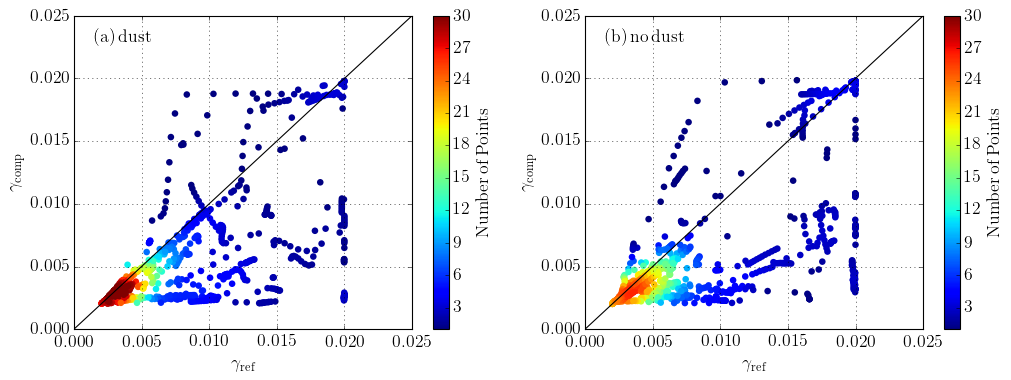

In [6]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df1["gamma_pop_ref"]
y = df1["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z/len(x), s = 35, edgecolors = 'none', vmin = 1, vmax = 30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)\,dust$')
plt.grid()

###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z/len(x), s = 35, edgecolors = 'none', vmin = 1, vmax = 30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)\,no\,dust$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

## location on the scatter plot

In [7]:
dust_case_index = df_gamma_dust_2ndngt.index.values
dust_sce_index  = (dust_case_index/49).astype(int)
dust_hour_index = dust_case_index % 49

df_dust_on = df_gamma_dust_2ndngt[((np.abs(df_gamma_dust_2ndngt["gamma_pop_error"])) <= 1)]
df_dust_above = df_gamma_dust_2ndngt[((df_gamma_dust_2ndngt["gamma_pop_error"]) > 20)]
df_dust_below = df_gamma_dust_2ndngt[((df_gamma_dust_2ndngt["gamma_pop_error"]) < -20)]

case_index = df_gamma_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

df_on = df_gamma_2ndngt[((np.abs(df_gamma_2ndngt["gamma_pop_error"])) <= 1)]
df_above = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) > 20)]
df_below = df_gamma_2ndngt[((df_gamma_2ndngt["gamma_pop_error"]) < -20)]

### below - dust

In [8]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
dust_case_index = df_dust_below.sort_values(by='gamma_pop_error', ascending=True).index.values
dust_sce_index  = (dust_case_index/49).astype(int)
dust_hour_index = dust_case_index % 49
print(dust_sce_index)
print(dust_hour_index)
print(df_dust_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[77 77 49 49 77 49 49 49 49 49 72 44 72 44 44 72 72 77 77 77 77 77 77 72
 77 77 77 72 72 72 72 72 72 72 75 75 75 75 75 75 75 75 75 75 75 75 98 98
 52 52 52 52 52 52 52 52 52 52 64 64 52 64 64 47 64 64 50 50 64 64 52 47
 47 64 50 64 64 50 64 50 50 50 50 47 50 50 50 50 56 63 63 63 56 30 47 82
 56 82 63 95  9 95 82 95 47 30 63 82 53 95  9 30 95 17 17 53 30 53 95 76
 30 35 82  9 53 98 30 53 17 35 95 76 30 76 53 82 30 53  9 17 30 53 95 30
 30 63 56 82  9 82 53 76 35 82 30 82  9  9 63 53 95 82 17 74 74 74 74  9
 74 74 53  9 97 51 76 47  9  9 35 53  9 83 51 76 83 74 51 51 51 51 51 35
 51 51 51 51 51 17 97 63 35 35 76 35 63 35 95 17 76 35 98 35  1  1 76 83
 97  1 97 76  1 76 97  1 63 76 97  1 17 97 42  1 47 97 97  1 97 42 63 17
 82 97 97 63 20 74 42 17 95 17 42 17 35  1  1 42  1  1 47 42 20 79 65 65
 42 98  3 79 65 42  3 79 79 79 79 42 79 65 20 65 74 79 42  3 15 79 42 95
 79 65 15 79 65  3 47 11 11 11 79 42 11 20 11 65 11 11 11 11 15 11  3 11
 65 11 65 65 20 74 65 15  3 81 20 81  3 20 15 81 81

### below - no dust

In [9]:
# print(df_below.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_below.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_below.shape)
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)

[66 66 66 66 88 88 88 88 88 88 88 88 88 46  3 46 80 80  3 50 46  3 83 80
 50 50 66 50 50 50 80  3 80 87 24 87 87  3 87 87  3 87  3 87 87 83 46 37
 37 87 37 24 80 37 37 87 37 66 37 87 37 24 46 83 80 67 24 67 87 67 46 45
 80 37 45 67 46 45 46 67 80 83 76 46 80 76 46 45 80 46 80 46 45 67 45 18
 76 18 18 83 67 69 27 18 37 66 67 32 67 32 67 30 67 27 32 67 27 30 32 45
 51 32 27 51 57 32 30 51 32 51 27 32 32 32 51 18 51 27 57 70 52 81 99 30
 94 51 99 99 51 69 99 27 76 51 76 52 32 70 99 76 83 51 76 76 21 76 57 76
 76 21 21 76 51 27 30 37 21 21 51 94 70 81 27 16 16 27 16 21 16 16 30 32
 16 82 16 27 21 57 30 52 82 16 82 70 18 45 21 16 82 66 82 30 82 30 21 66
 82 16 57 81 82 82 30 82 21 16 30 82 66 30 94 39 82 16 21 21 52 27 79  5
 57 70 83  5 37 39  5 23 81 23 66 18 23 23 57  5 23 45 52 69 23 70 69 52
  5 94 69 69 39 69 94 69 70 69 69 69 52 94 94 52 69 52 94 94  5 62 52 57
 94 52 81 66 79 52 62  5 62 62 62 62 62 93 62 62 57 62 39  8 96 70 62 62
 83 93 23  5 93  8 57  8 18 93  8 96 81 70 93  5 39

### on - dust

In [10]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
dust_case_index = df_dust_on.sort_values(by='gamma_pop_error', ascending=True).index.values
dust_sce_index  = (dust_case_index/49).astype(int)
dust_hour_index = dust_case_index % 49
print(dust_sce_index)
print(dust_hour_index)
print(df_dust_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[18 38 27 25  0 38 80  0 37 25 80 80 37  0 80 18 38 25 25 80  0 39 12 18
 37 38 80 38 96 96 37 18 38 96 22 96 38 96 14 14 96 27 14 14 96 14 14 37
 96 14 96 14 96 14 14 14 34 96 96 14 18 25 80 18  5 27 18 25 92 40 83 18
 26 27 18 27 27 27 39 83]
[40 43 38 47 47 42 45 45 44 44 39 46 45 48 47 41 44 48 41 48 44 48 43 42
 46 45 38 46 37 38 47 43 47 39 42 40 48 41 41 40 42 39 39 42 43 38 43 48
 44 44 45 45 46 37 46 47 39 47 48 48 44 43 37 45 37 40 46 42 47 38 43 47
 42 41 48 44 43 42 47 42]
(80, 3)


### on - no dust

In [11]:
# print(df_on.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_on.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_on.shape)
# pd.set_option('display.max_columns', df_wsd.shape[0]+1)

[74 89 89  9 89 19 12 48 48 48 48 48 48 48 48  9 12  9 74 42 63 26 12 72
 72 19 72 72 72 26 72 72 74 72 72 72 15 26 72 72 12  9 74  2 26 19 74 26
 14 26 26  4 26 12 14  4 26 14  4 19 26  4 14 14  4 26 14 74 14 14 14 14
 14 14 26  4  2  2  2  2  4 12  2  2  2  2 48  4 48 34 48  4 34  9  2  4
 48 34  2 12  2  4 34  4 34 12 34 15 40  9 40 40 71 40 34]
[43 44 46 46 45 45 44 44 37 38 43 42 40 39 41 45 43 44 44 41 47 37 42 42
 43 46 44 45 46 38 37 38 45 39 40 41 40 39 47 48 41 43 46 37 40 47 47 43
 37 44 41 40 45 40 38 39 42 39 48 48 46 47 40 41 41 47 42 48 46 43 48 47
 45 44 48 46 44 42 43 45 38 39 46 47 48 41 45 42 46 37 47 37 38 42 40 45
 48 39 39 38 38 43 40 44 41 37 42 39 48 41 46 47 46 45 43]
(115, 3)


### above - dust

In [12]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
dust_case_index = df_dust_above.sort_values(by='gamma_pop_error', ascending=True).index.values
dust_sce_index  = (dust_case_index/49).astype(int)
dust_hour_index = dust_case_index % 49
print(dust_sce_index)
print(dust_hour_index)
print(df_dust_above.shape)

[68 34 86  7 12 68 86  7 86  7 12 58 34 86 58 58 58 58 58 58 58 58 58 68
 58 86 12  4 58 86 34 86 86 34 68  4 86  4 34  4  4 86 34]
[38 43 38 42 39 37 37 40 39 41 38 40 44 40 41 43 42 38 37 46 39 44 45 43
 47 46 37 40 48 41 45 42 43 46 44 41 44 48 47 47 46 45 48]
(43, 3)


### above - no dust

In [13]:
# print(df_above.sort_values(by='gamma_pop_error2', ascending=True))
case_index = df_above.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_above.shape)

[97 97 94 97 71 97 56 35 17 35 17 35  0 35 35 35 17 56 17  0  0  0  0  0
  0  0  0  0  0 17  0 56 17 17 17 17 17 56 56 56 56 56 56 56 56 56]
[38 37 46 44 37 43 37 42 46 41 45 40 48 39 38 37 44 38 43 43 45 42 47 44
 38 41 40 39 37 42 46 48 41 40 39 38 37 47 39 46 45 44 43 42 41 40]
(46, 3)


# size distributions

## read data - dust

In [7]:
h1 = np.zeros((2,100,49,180)) # gamma * surf_dist
h2 = np.zeros((2,100,49,180)) # surf_area_dist
hgamma = np.zeros((2,100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((2,100,49,180))
no3_dist = np.zeros((2,100,49,180))
so4_dist = np.zeros((2,100,49,180))
wi_dist = np.zeros((2,100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[0,sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[0,sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[0,sce_index, t_index,:] = h1[0,sce_index, t_index,:]/h2[0,sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            num_dist[0,sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[0,sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[0,sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[0,sce_index,t_index,:] = so4_dist[0,sce_index,t_index,:]/(so4_dist[0,sce_index,t_index,:]+no3_dist[0,sce_index,t_index,:])

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/2_comp_avg/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[1,sce_index, t_index,:] = ncf.variables["gamma_surf_avg"].data*1e6 # m-3 to cm-3
            h2[1,sce_index, t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6 # m-3 to cm-3
            hgamma[1,sce_index, t_index,:] = h1[1,sce_index, t_index,:]/h2[1,sce_index, t_index,:]
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[1,sce_index,t_index,:] = ncf.variables["num_dist_avg"].data*1e6 # m-3 to cm-3
            no3_dist[1,sce_index,t_index,:] = ncf.variables["mass_no3_dist_avg"].data*1e9
            so4_dist[1,sce_index,t_index,:] = ncf.variables["mass_so4_dist_avg"].data*1e9
            wi_dist[1,sce_index,t_index,:] = so4_dist[1,sce_index,t_index,:]/(so4_dist[1,sce_index,t_index,:]+no3_dist[1,sce_index,t_index,:])

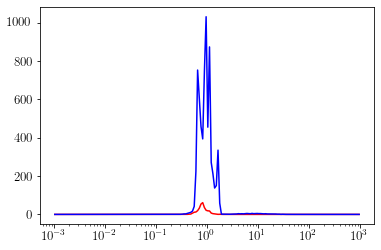

In [10]:
# fig, ax = plt.subplots(12,figsize=(6,5))

# twin1 = ax.twinx()

# ax.plot(diam,surf_area_dist[0,77,48,:], color = 'r')
# twin1.plot(diam,surf_area_dist[1,77,48,:], color = 'b')

plt.plot(diam,surf_area_dist[0,66,38,:], color = 'r')
plt.plot(diam,surf_area_dist[1,66,38,:], color = 'b')

plt.xscale('log')

## read data - no dust

In [5]:
h1 = np.zeros((2,100,49,180)) # gamma * surf_dist
h2 = np.zeros((2,100,49,180)) # surf_area_dist
hgamma = np.zeros((2,100,49,180))
surf_area_dist = np.zeros((2,100,49,180)) # for PR
mass_dist = np.zeros((2,100,49,180))
num_dist = np.zeros((2,100,49,180))
no3_dist = np.zeros((2,100,49,180))
so4_dist = np.zeros((2,100,49,180))
wi_dist = np.zeros((2,100,49,180))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[0,sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2[0,sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma[0,sce_index, t_index,:] = h1[0,sce_index, t_index,:]/h2[0,sce_index, t_index,:]
            surf_area_dist[0,sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[0,sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e12 # kg to ng
            num_dist[0,sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[0,sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[0,sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[0,sce_index,t_index,:] = so4_dist[0,sce_index,t_index,:]/(so4_dist[0,sce_index,t_index,:]+no3_dist[0,sce_index,t_index,:])

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/2_comp_avg/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1[1,sce_index, t_index,:] = ncf.variables["gamma_surf_avg"].data*1e6 # m-3 to cm-3
            h2[1,sce_index, t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6 # m-3 to cm-3
            hgamma[1,sce_index, t_index,:] = h1[1,sce_index, t_index,:]/h2[1,sce_index, t_index,:]
            surf_area_dist[1,sce_index,t_index,:] = ncf.variables["surf_area_dist_avg"].data*1e6
            mass_dist[1,sce_index,t_index,:] = ncf.variables["mass_dist_avg"].data*1e9 # kg to µg
            num_dist[1,sce_index,t_index,:] = ncf.variables["num_dist_avg"].data*1e6 # m-3 to cm-3
            no3_dist[1,sce_index,t_index,:] = ncf.variables["mass_no3_dist_avg"].data*1e9
            so4_dist[1,sce_index,t_index,:] = ncf.variables["mass_so4_dist_avg"].data*1e9
            wi_dist[1,sce_index,t_index,:] = so4_dist[1,sce_index,t_index,:]/(so4_dist[1,sce_index,t_index,:]+no3_dist[1,sce_index,t_index,:])

## plot

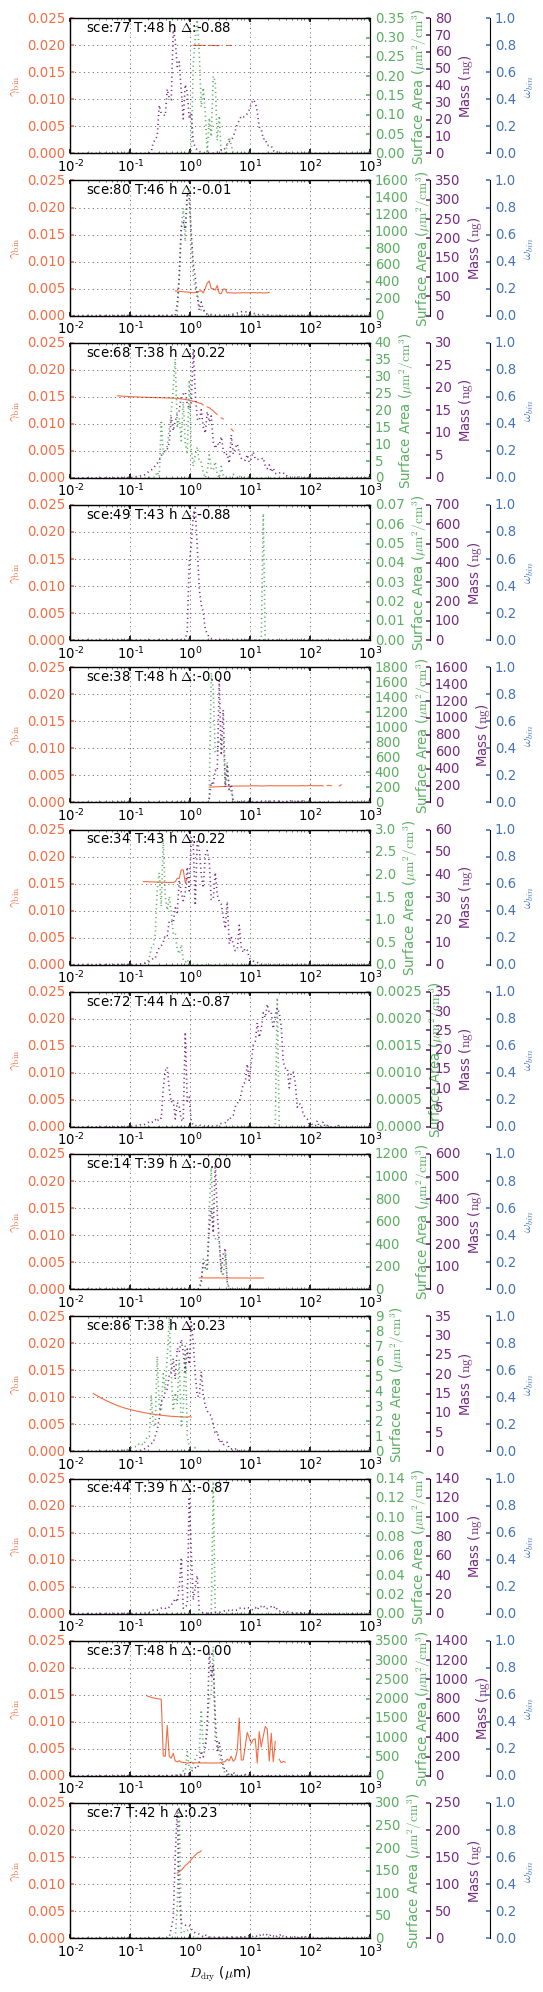

In [17]:
fig, ax = plt.subplots(12,figsize=(6,30))
fig.subplots_adjust(right=0.75)

sce_index = [77,80,68,49,38,34,72,14,86,44,37,7]
t_index = [48,46,38,43,48,43,44,39,38,39,48,42]

for i in range(12):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[0,sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[0,sce_index[i], t_index[i],:])

    w = wi_dist[0,sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[0,sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam, y, color = "#f46d43", ls = '-', lw = 1)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "#5aae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "#762a83", ls = ':', lw = 1.5)
    # p4 = twin3.plot(diam[wm], w[wm], color = "#4575b4", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0,0.025)
    twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm ng$)')
    twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('#f46d43')
    twin1.yaxis.label.set_color('#5aae61')
    twin2.yaxis.label.set_color('#762a83')
    twin3.yaxis.label.set_color('#4575b4')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#f46d43', **tkw)
    twin1.tick_params(axis='y', colors='#5aae61', **tkw)
    twin2.tick_params(axis='y', colors='#762a83', **tkw)
    twin3.tick_params(axis='y', colors='#4575b4', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop_dust[1,sce_index[i],t_index[i]] - gamma_pop_dust[0,sce_index[i],t_index[i]])/gamma_pop_dust[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(0.018, 0.0225, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

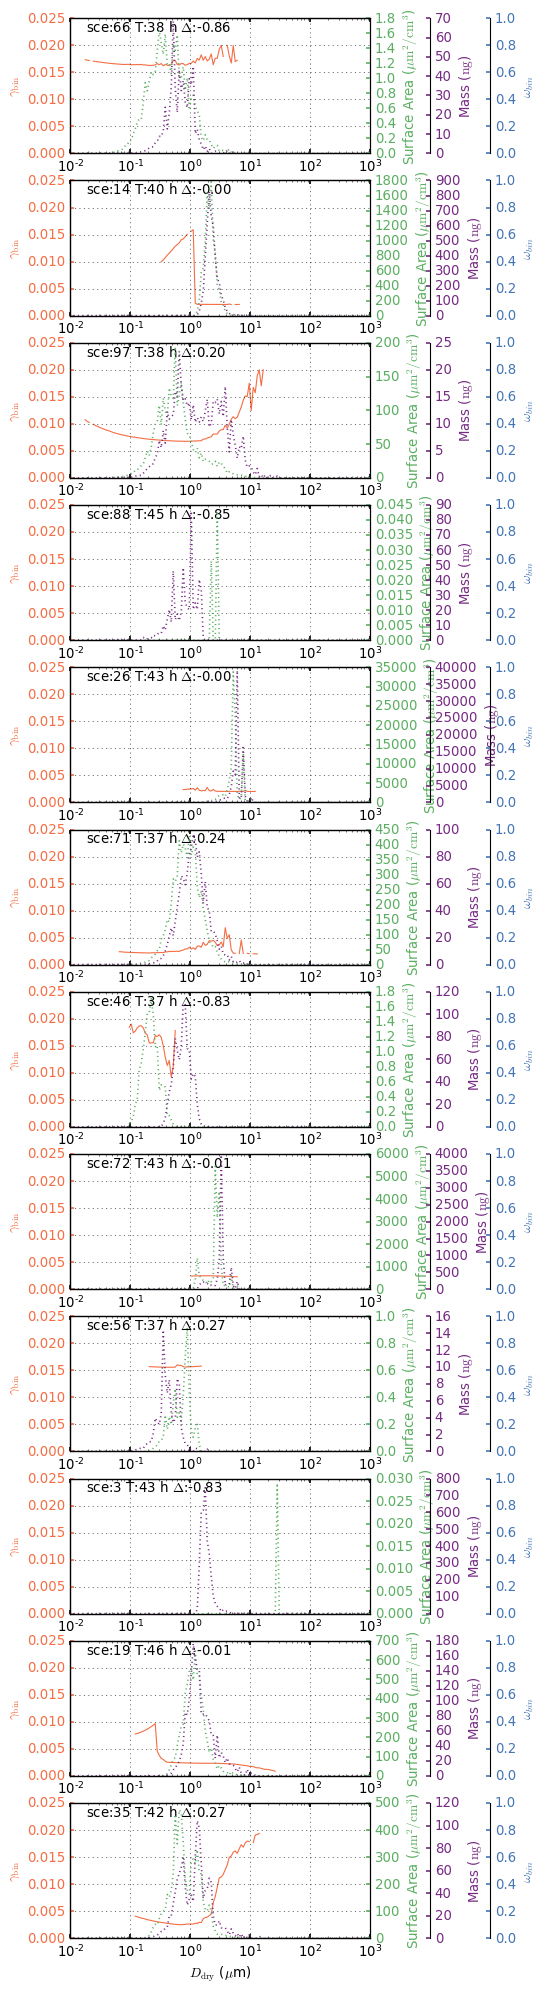

In [6]:
fig, ax = plt.subplots(12,figsize=(6,30))
fig.subplots_adjust(right=0.75)

sce_index = [66,14,97,88,26,71,46,72,56,3,19,35]
t_index = [38,40,38,45,43,37,37,43,37,43,46,42]

for i in range(12):
    twin1 = ax[i].twinx()
    twin2 = ax[i].twinx()
    twin3 = ax[i].twinx()

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines['right'].set_position(("axes", 1.2))
    twin3.spines['right'].set_position(("axes", 1.4))

    y = hgamma[0,sce_index[i], t_index[i],:]
    ym = np.isfinite(hgamma[0,sce_index[i], t_index[i],:])

    w = wi_dist[0,sce_index[i], t_index[i], :]
    wm = np.isfinite(wi_dist[0,sce_index[i], t_index[i], :])

    p1 = ax[i].plot(diam, y, color = "#f46d43", ls = '-', lw = 1)
    p2 = twin1.plot(diam, surf_area_dist[0,sce_index[i], t_index[i], :], color = "#5aae61", ls = ':', lw = 1.5)
    p3 = twin2.plot(diam, mass_dist[1,sce_index[i], t_index[i], :], color = "#762a83", ls = ':', lw = 1.5)
    # p4 = twin3.plot(diam[wm], w[wm], color = "#4575b4", ls = '-', lw = 1)

    ax[i].set_xscale('log')
    ax[i].set_xlim(1e-2, 1e3)
    ax[i].set_ylim(0,0.025)
    twin3.set_ylim(0, 1)
    # twin1.set_ylim(0, 4)
    # twin2.set_ylim(1, 65)

    ax[i].set_xlabel(r'$D_{\rm dry}$ ($\mu$m)')
    ax[i].set_ylabel(r'$\rm \gamma_{bin}$') 
    twin1.set_ylabel(r'Surface Area ($\rm \mu m^2/cm^3$)')
    twin2.set_ylabel(r'Mass ($\rm ng$)')
    twin3.set_ylabel(r'$\omega_{bin}$')

    ax[i].yaxis.label.set_color('#f46d43')
    twin1.yaxis.label.set_color('#5aae61')
    twin2.yaxis.label.set_color('#762a83')
    twin3.yaxis.label.set_color('#4575b4')

    tkw = dict(size=4, width=1.5)
    ax[i].tick_params(axis='y', colors='#f46d43', **tkw)
    twin1.tick_params(axis='y', colors='#5aae61', **tkw)
    twin2.tick_params(axis='y', colors='#762a83', **tkw)
    twin3.tick_params(axis='y', colors='#4575b4', **tkw)
    ax[i].tick_params(axis='x', **tkw)

    # plt.axhline(y = np.mean(nmass_dist[sce_index[i], t_index, :]), color='g')
    # plt.axhline(y = np.mean(nsurf_area_dist[sce_index[i], t_index, :]), color='r')

    error = (gamma_pop[1,sce_index[i],t_index[i]] - gamma_pop[0,sce_index[i],t_index[i]])/gamma_pop[0,sce_index[i],t_index[i]]
    ax[i].grid()
    ax[i].text(0.018, 0.0225, r'sce:%d T:%d h $\Delta$:%.2f'% (sce_index[i], t_index[i],error))

# ax.legend(handles=[p1, p2, p3])
# plt.savefig('gamma_overestimation.pdf')

# k_n2o5 comparision

## read data

In [2]:
# read in data with dust emission
reac_coeff_dust = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            reac_coeff_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            reac_coeff_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600
#################
reac_coeff = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            reac_coeff[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            reac_coeff[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600

In [3]:
# calculate gamma_pop_error
reac_coeff_error_dust = (reac_coeff_dust[1,:,:].ravel() - 
               reac_coeff_dust[0,:,:].ravel())/reac_coeff_dust[0,:,:].ravel()

d_k_dust = {"n2o5_uptake_ref": reac_coeff_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
            "n2o5_uptake_comp": reac_coeff_dust[1, :, :].ravel(),
            "reac_coeff_error": reac_coeff_error_dust * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_k_dust = pd.DataFrame(data=d_k_dust)
print(df_k_dust.shape)

df_k_dust_2ndngt = df_k_dust[((df_k_dust.index.values % 49) >= 37) & ((df_k_dust.index.values % 49) <= 48)]
print(df_k_dust_2ndngt.shape)

df3 = df_k_dust_2ndngt.dropna()
print(df3.shape)
null_data = df_k_dust_2ndngt[df_k_dust_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(935, 3)
[ 2  2  2  2  2  2  2  2  2  2  2 10 10 10 10 10 10 10 10 10 10 10 10 13
 13 13 13 13 13 13 13 13 13 13 13 24 24 24 24 24 24 24 24 24 24 24 24 32
 32 32 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 33 36
 36 36 36 36 36 36 36 36 36 36 36 43 43 43 43 43 43 43 43 43 43 43 43 44
 44 44 44 44 44 44 44 44 46 46 46 46 46 46 46 46 46 46 46 46 49 49 49 49
 49 54 54 54 54 54 54 54 54 54 54 54 54 59 59 59 59 59 59 59 59 59 59 59
 59 60 60 60 60 60 60 60 60 60 60 60 60 62 62 62 62 62 62 62 62 62 62 62
 62 69 69 69 69 69 69 69 69 69 69 69 69 70 70 70 70 70 70 70 70 70 70 70
 70 78 78 78 78 78 78 78 78 78 78 78 78 84 84 84 84 84 84 84 84 84 84 84
 84 87 87 87 87 87 87 87 87 87 87 87 87 88 88 88 88 88 88 88 88 88 88 88
 88 90 90 90 90 90 90 90 90 90 90 90 90 94 94 94 94 94 94 94 94 94 94 94
 94]
[38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37
 38 39 40 41 42 4

In [4]:
# calculate gamma_pop_error
reac_coeff_error = (reac_coeff[1,:,:].ravel() - 
               reac_coeff[0,:,:].ravel())/reac_coeff[0,:,:].ravel()

d_k = {"n2o5_uptake_ref": reac_coeff[0, :, :].ravel(),  # wsd: with seasalt and dust
        "n2o5_uptake_comp": reac_coeff[1, :, :].ravel(),
        "reac_coeff_error": reac_coeff_error * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_k = pd.DataFrame(data=d_k)
print(df_k.shape)

df_k_2ndngt = df_k[((df_k.index.values % 49) >= 37) & ((df_k.index.values % 49) <= 48)]
print(df_k_2ndngt.shape)

df4 = df_k_2ndngt.dropna()
print(df4.shape)
null_data = df_k_2ndngt[df_k_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

(4900, 3)
(1200, 3)
(965, 3)
[ 1  1  1  1  1  1  1  1  1  1  1  1  3  3  3  3  3  6  6  6  6  6  6  6
  6  6  6  6  6 24 24 24 24 24 24 24 24 28 28 28 28 28 28 28 28 28 28 28
 28 29 29 29 29 29 29 29 29 31 31 31 31 31 31 31 31 31 31 31 31 33 33 33
 33 33 33 33 33 33 33 33 33 36 36 36 36 36 36 36 36 36 36 36 36 38 38 38
 38 38 38 38 38 38 38 38 38 41 41 41 41 41 41 41 41 41 41 41 41 43 43 43
 43 43 43 43 43 43 43 43 43 49 49 49 49 49 49 49 49 49 49 49 49 54 54 54
 54 54 54 54 54 54 54 54 54 59 59 59 59 59 59 59 59 59 59 59 59 60 60 60
 60 60 60 60 60 60 60 60 60 64 64 64 64 64 64 64 64 64 64 64 64 77 77 77
 77 77 77 77 77 77 77 77 77 84 84 84 84 84 84 84 88 88 88 91 91 91 91 91
 91 91 91 91 91 91 91 95 95 95 95 95 95 95 95 95 95 95 95]
[37 38 39 40 41 42 43 44 45 46 47 48 44 45 46 47 48 37 38 39 40 41 42 43
 44 45 46 47 48 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47
 48 41 42 43 44 45 46 47 48 37 38 39 40 41 42 43 44 45 46 47 48 37 38 39
 40 41 42 43 44 45 46 47 48 37 38 39

## plot

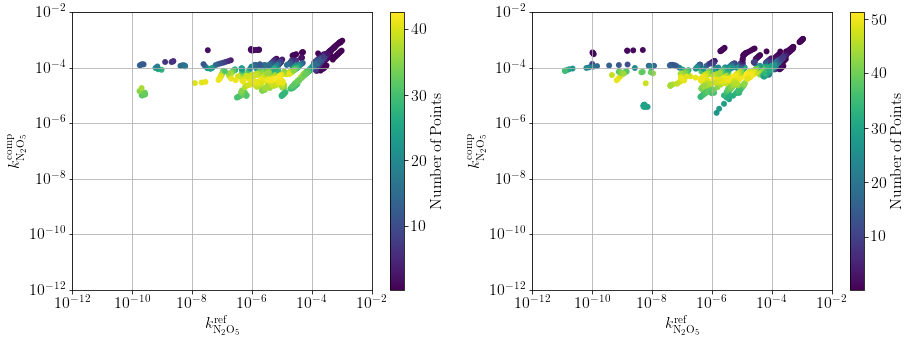

In [5]:
# Only nighttime cases

from scipy.stats import gaussian_kde
# from matplotlib import style
# plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xscale('log'); plt.yscale('log')
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["n2o5_uptake_ref"]
y = df3["n2o5_uptake_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-6, s = 35, edgecolors = 'none')
plt.xlim(1e-12,1e-2);plt.ylim(1e-12,1e-2)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$k_{\rm N_2O_5}^{\rm ref}$')
plt.ylabel(r'$k_{\rm N_2O_5}^{\rm comp}$')
# plt.text(0.0015, 0.023, r'$(a)\,dust)$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xscale('log'); plt.yscale('log')
# plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df4["n2o5_uptake_ref"]
y = df4["n2o5_uptake_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-6, s = 35, edgecolors = 'none')
plt.xlim(1e-12,1e-2);plt.ylim(1e-12,1e-2)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$k_{\rm N_2O_5}^{\rm ref}$')
plt.ylabel(r'$k_{\rm N_2O_5}^{\rm comp}$')
# plt.text(0.0015, 0.023, r'$(b)\,no\,dust$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# chi

## read data - dust

In [5]:
# read in data with dust emission
gamma_pop_dust = np.zeros((3,100,49))
k_dust = np.zeros((3,100,49))
chi_n2o5_dust = np.zeros((2,100,49))
bulk_masses = np.zeros((100,49))
wet_frac = np.zeros((2,100,49))
npart_dust = np.zeros((2,100,49))
nwet_dust = np.zeros((2,100,49))
tot_surf_area = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_dust[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_dust[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            k_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            k_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            chi_n2o5_dust[0, sce, :] = ncf.variables["chi_n2o5_pr"].data
            chi_n2o5_dust[1, sce, :] = ncf.variables["chi_n2o5_comp"].data
            bulk_masses[sce, :] = ncf.variables['bulk_h2o_masses'].data * 1e9  # kg to µg
            nwet_dust[0, sce, :] = ncf.variables['nwet'].data
            nwet_dust[1, sce, :] = ncf.variables['nwet_avg'].data
            npart_dust[0, sce, :] = ncf.variables['npart'].data
            npart_dust[1, sce, :] = ncf.variables['npart_avg'].data
            tot_surf_area[0, sce, :] = ncf.variables['tot_surf_area_pr'].data
            tot_surf_area[1, sce, :] = ncf.variables['tot_surf_area_avg'].data
            time = ncf.variables["time"].data/3600
            wet_frac[0, sce,:] = nwet_dust[0, sce, :]/npart_dust[0, sce, :]
            wet_frac[1, sce,:] = nwet_dust[1, sce, :]/npart_dust[1, sce, :]

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/2_comp_avg/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_dust[2, sce, :] = ncf.variables["gamma_pop_comp"].data
            k_dust[2, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            time = ncf.variables["time"].data/3600

In [6]:
rh = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    rh[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,2] # time, temperature, RH, pressure, mixing height

print(rh.shape)
print(rh)
# print(df_env)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[0.6238 0.6238 0.6238 ... 0.6238 0.6238 0.6238]
 [0.3681 0.3681 0.3681 ... 0.3681 0.3681 0.3681]
 [0.1945 0.1945 0.1945 ... 0.1945 0.1945 0.1945]
 ...
 [0.5363 0.5363 0.5363 ... 0.5363 0.5363 0.5363]
 [0.4603 0.4603 0.4603 ... 0.4603 0.4603 0.4603]
 [0.3847 0.3847 0.3847 ... 0.3847 0.3847 0.3847]]


In [7]:
# calculate gamma_pop_error
gamma_pop_error_dust = (gamma_pop_dust[1,:,:].ravel() - 
               gamma_pop_dust[0,:,:].ravel())/gamma_pop_dust[0,:,:].ravel()
new_gamma_error = (gamma_pop_dust[2,:,:].ravel() - 
               gamma_pop_dust[0,:,:].ravel())/gamma_pop_dust[0,:,:].ravel()
k_error_dust = (k_dust[1,:,:].ravel() - 
               k_dust[0,:,:].ravel())/k_dust[0,:,:].ravel()
new_k_error = (k_dust[2,:,:].ravel() - 
               k_dust[0,:,:].ravel())/k_dust[0,:,:].ravel()
tot_surf_area_diff = (tot_surf_area[1, :, :].ravel() - tot_surf_area[0, :, :].ravel())/tot_surf_area[0, :, :].ravel()

d_dust = {"gamma_pop_ref": gamma_pop_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
          "gamma_pop_comp": gamma_pop_dust[1, :, :].ravel(),
          "gamma_pop_error": gamma_pop_error_dust * 100,
          'new_gamma_error': new_gamma_error * 100,
          "k_ref": k_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
          "k_comp": k_dust[1, :, :].ravel(),
          "k_error": k_error_dust * 100,
          'new_k_error': new_k_error * 100,
          "chi_n2o5_pr": chi_n2o5_dust[0,:,:].ravel() * 100,
          "chi_n2o5_comp": chi_n2o5_dust[1,:,:].ravel() * 100,
          'wet_frac_pr': wet_frac[0,:,:].ravel() * 100,
          'wet_frac_comp': wet_frac[1,:,:].ravel() * 100,
          'tot_surf_area_diff': tot_surf_area_diff * 100,
          'rh': rh[:,:].ravel() * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_dust = pd.DataFrame(data=d_dust)
print(df_dust.shape)

df_dust_2ndngt = df_dust[((df_dust.index.values % 49) >= 37) & ((df_dust.index.values % 49) <= 48)]
print(df_dust_2ndngt.shape)

df5 = df_dust_2ndngt.dropna()
print(df5.shape)
print(df5.iloc[:,8])
# print(df1.wet_frac.sort_values(ascending = True))
# null_data = df_dust_2ndngt[df_dust_2ndngt.isnull().any(axis=1)]
# null_case_index = null_data.index.values
# null_sce_index  = (null_case_index/49).astype(int)
# null_hour_index = null_case_index % 49
# print(null_sce_index)
# print(null_hour_index)
# print(null_data.shape)

(4900, 14)
(1200, 14)
(930, 14)
37      79.998205
38      80.089599
39      80.427418
40      80.768879
41      81.208356
          ...    
4895    40.828004
4896    41.140493
4897    40.480716
4898    39.618503
4899    39.194494
Name: chi_n2o5_pr, Length: 930, dtype: float64


## plot

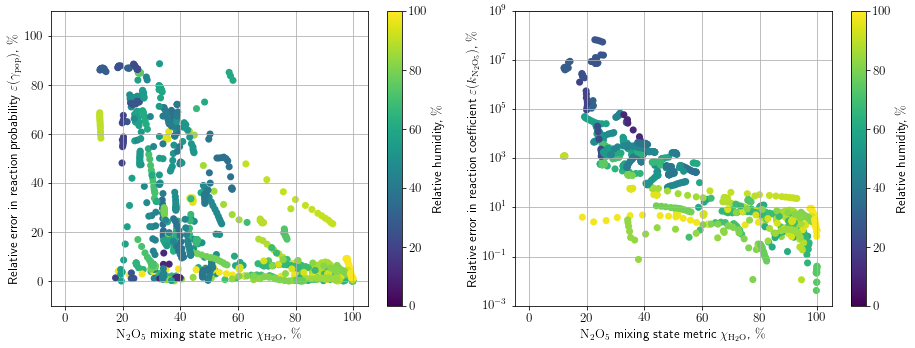

In [11]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.gamma_pop_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

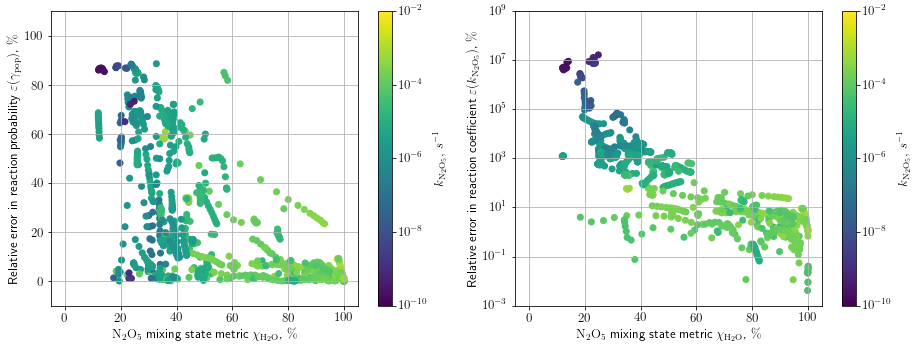

In [20]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.gamma_pop_error), c = df5.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi_k_color.pdf')

(618, 14)


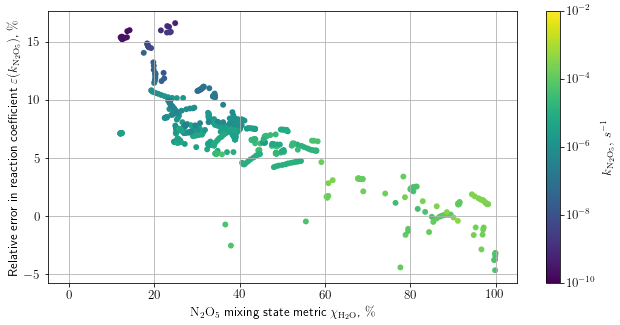

In [71]:
# Only nighttime cases
df6 = df5[df5["k_error"] > 0]
print(df6.shape)

mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(6.5*1.618,5))
###################
im1 = plt.scatter(df5.chi_n2o5_pr, np.log(df5.k_error), c = df5.k_ref, edgecolors = 'none', s= 35, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-1e5,1e5)
# plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

# plt.savefig('gamma_error_vs_chi_gamma.pdf')

note: golden ratio, not square

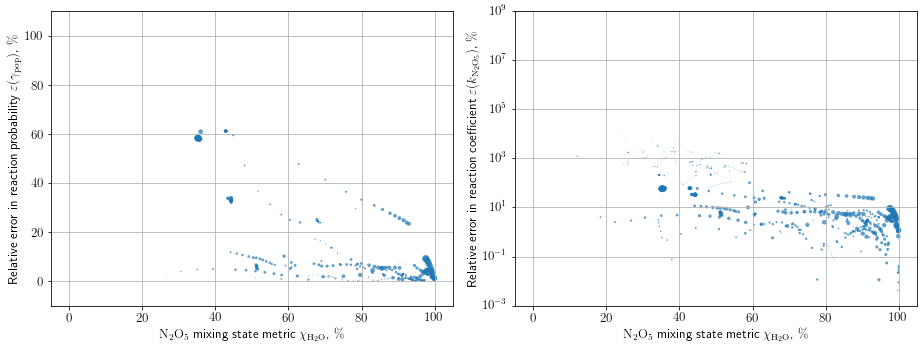

In [53]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True
k_max = np.max(df5.k_ref)
k_avg = np.mean(df5.k_ref)

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.gamma_pop_error), edgecolors = 'none', alpha = 0.7, s= 50*(df5.k_ref-k_avg)/(k_max-k_avg))
# kw = dict(prop="sizes", num=4, color='k', markerfacecolor='b', fmt="{x:.1f}",
#             func=lambda s: s/1e3)
# plt.legend(*im1.legend_elements(**kw),
#             loc=i, title=r"$\omega$", numpoints = 1, prop={'size':10})
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), edgecolors = 'none', alpha = 0.7, s= 50*(df5.k_ref-k_min)/(k_max-k_min))
# kw = dict(prop="sizes", num=4, color='k', markerfacecolor='b', fmt="{x:.1f}",
#             func=lambda s: s/1e3)
# plt.legend(*im1.legend_elements(**kw),
#             loc=i, title=r"$\omega$", numpoints = 1, prop={'size':10})
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi_k_size.pdf')

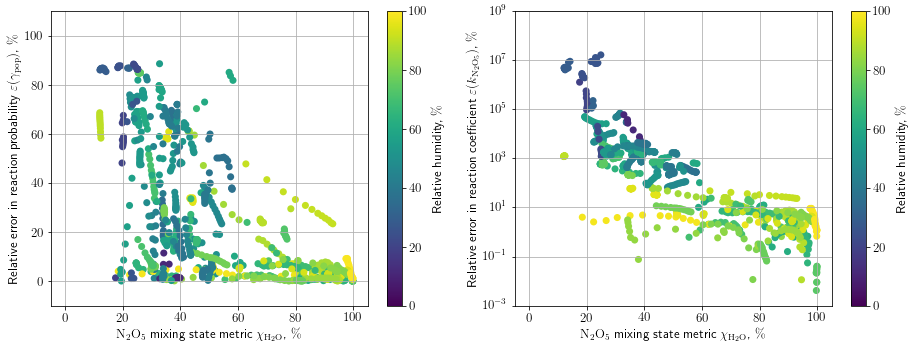

In [20]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.gamma_pop_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

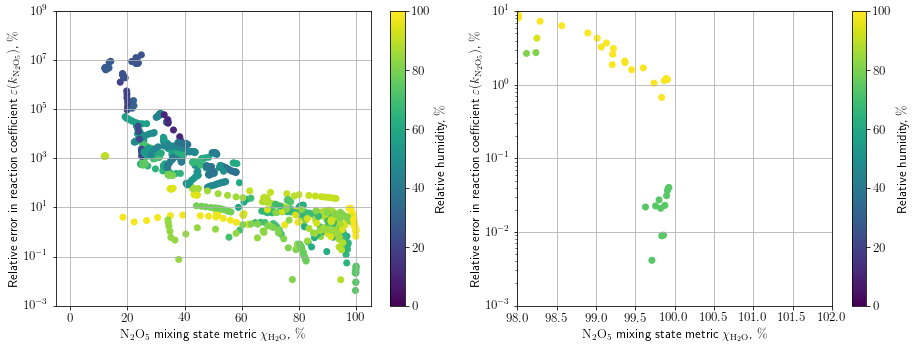

In [22]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.rh, edgecolors = 'none', s= 50, vmin = 0, vmax = 100)
plt.xlim(98,102)
plt.ylim(1e-3,1e1)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Relative humidity, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

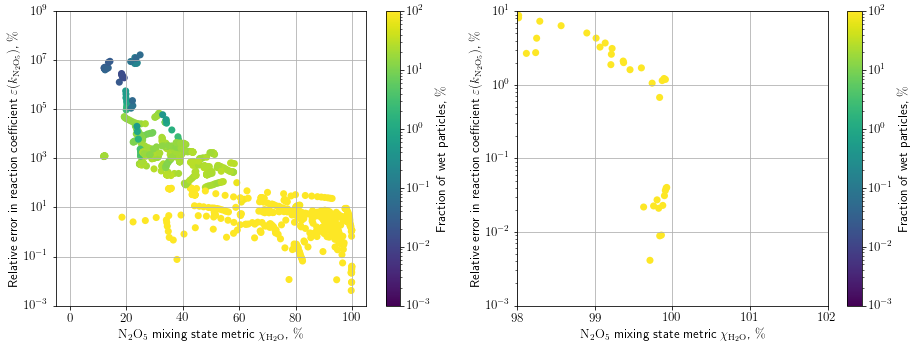

In [28]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.wet_frac, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-3, 1e2))
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Fraction of wet particles, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.k_error), c = df5.wet_frac, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-3, 1e2))
plt.xlim(98,102)
plt.ylim(1e-3,1e1)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Fraction of wet particles, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

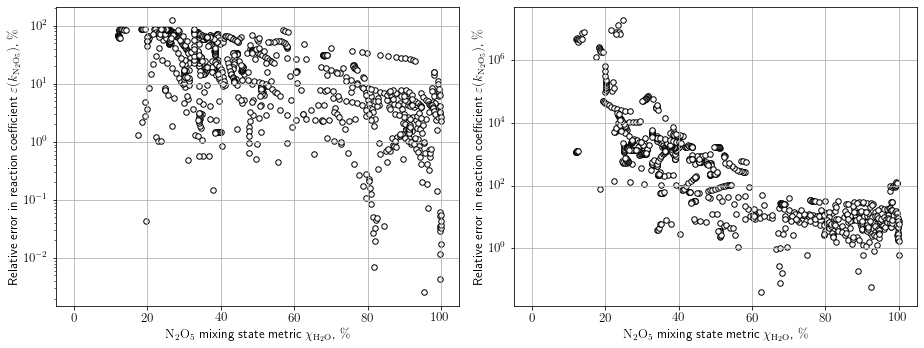

In [21]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.new_gamma_error), edgecolors = 'k', color = 'white', s= 30)
plt.xlim(-5,105)
# plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.new_k_error), edgecolors = 'k', color = 'white', s= 30)
plt.xlim(-5,105)
# plt.ylim(1e-3,1e1)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

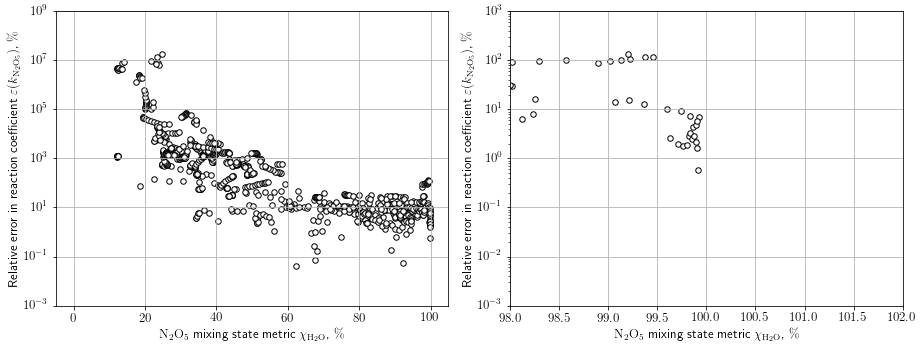

In [26]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.new_k_error), edgecolors = 'k', color = 'white', s= 30)
plt.xlim(-5,105)
plt.ylim(1e-3,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, abs(df5.new_k_error), edgecolors = 'k', color = 'white', s= 30)
plt.xlim(98,102)
plt.ylim(1e-3,1e3)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

(930, 12)


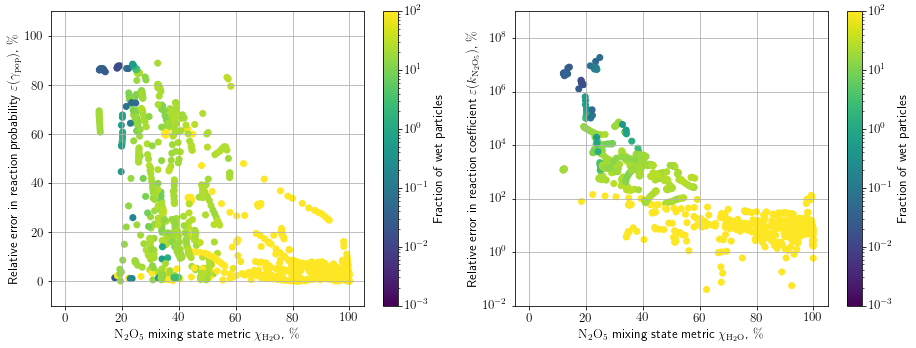

In [46]:
# Only nighttime cases
df2 = df1[df1["wet_frac"] > 0]
print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df2.chi_n2o5, abs(df2.gamma_pop_error), c = df2.wet_frac, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-3, 1e2))
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Fraction of wet particles')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df2.chi_n2o5, abs(df2.k_error), c = df2.wet_frac, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-3, 1e2))
plt.xlim(-5,105)
plt.ylim(1e-2,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Fraction of wet particles')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi_wet_frac_color.pdf')

(930, 12)


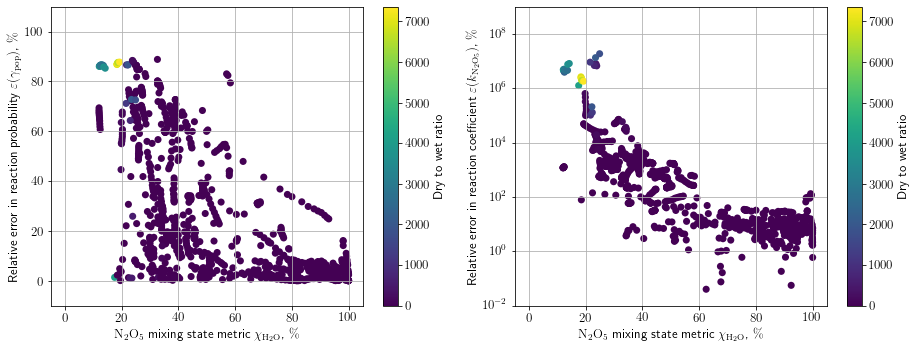

In [10]:
# Only nighttime cases
df2 = df1[df1["wet_frac"] > 0]
print(df2.shape)

# Only nighttime cases

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.gamma_pop_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df2.chi_n2o5, abs(df2.gamma_pop_error), c = df2.dry_to_wet, edgecolors = 'none', s= 50)
plt.xlim(-5,105)
plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction probability $\varepsilon(\gamma_{\rm pop})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Dry to wet ratio')
# plt.text(-2, 115, r'$\rm (a)\,compare\,population\,gammas\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df2.chi_n2o5, abs(df2.k_error), c = df2.dry_to_wet, edgecolors = 'none', s= 50)
plt.xlim(-5,105)
plt.ylim(1e-2,1e9)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5$ mixing state metric $\chi_{\rm H_2O}$, $\%$')
plt.ylabel(r'Relative error in reaction coefficient $\varepsilon(k_{\rm N_2O_5})$, $\%$')
cbar = plt.colorbar()
cbar.set_label(r'Dry to wet ratio')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi_wet_frac_color.pdf')

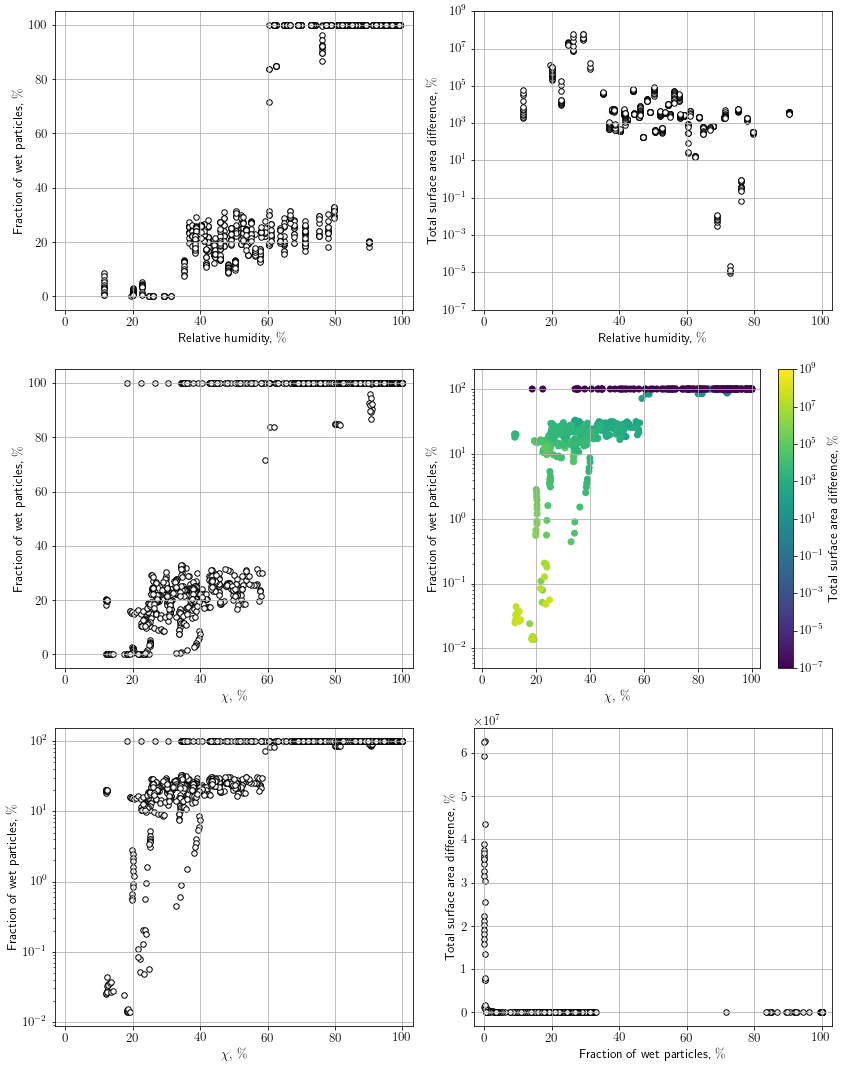

In [38]:
# Only nighttime cases

# Only nighttime cases

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(12,15))
###################
plt.subplot(3,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.rh, df5.wet_frac_pr, edgecolors = 'k', s= 30, color = 'white')
plt.xlim(-3,103)
# plt.ylim(1e-2,1e9)
# plt.yscale('log')
plt.xlabel('Relative humidity, $\%$')
plt.ylabel('Fraction of wet particles, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(3,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.rh, df5.tot_surf_area_diff, edgecolors = 'k', s= 30, color = 'white')
plt.xlim(-3,103)
plt.ylim(1e-7,1e9)
plt.yscale('log')
plt.xlabel('Relative humidity, $\%$')
plt.ylabel('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(3,2,3)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, df5.wet_frac_pr, edgecolors = 'k', s= 30, color = 'white')
plt.xlim(-3,103)
# plt.ylim(1e-2,1e9)
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(3,2,4)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, df5.wet_frac_pr, c = df5.tot_surf_area_diff, edgecolors = 'None', s= 50, norm=mpl.colors.LogNorm(1e-7, 1e9))
plt.xlim(-3,103)
plt.ylim(5e-3,2e2)
plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
cbar = plt.colorbar()
cbar.set_label('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(3,2,5)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, df5.wet_frac_pr, edgecolors = 'k', s= 30, color = 'white')
plt.xlim(-3,103)
# plt.ylim(99,101)
plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(3,2,6)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.wet_frac_pr, df5.tot_surf_area_diff, edgecolors = 'k', s= 30, color = 'white')
plt.xlim(-3,103)
# plt.ylim(1e-7,1e9)
# plt.yscale('log')
plt.xlabel('Fraction of wet particles, $\%$')
plt.ylabel('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi_wet_frac_color.pdf')

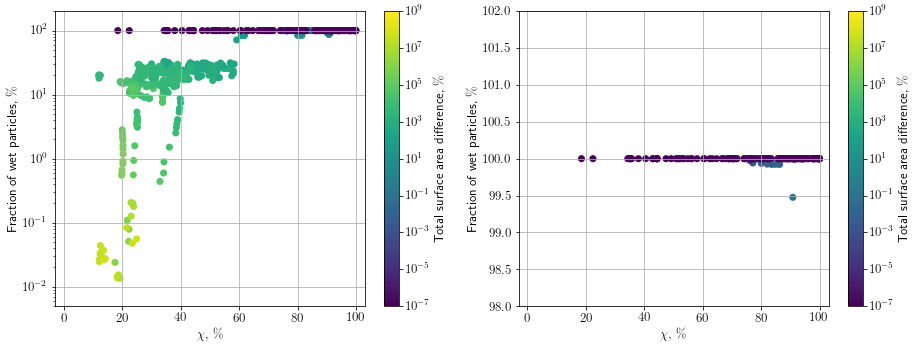

In [43]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, df5.wet_frac_pr, c = df5.tot_surf_area_diff, edgecolors = 'None', s= 50, norm=mpl.colors.LogNorm(1e-7, 1e9))
plt.xlim(-3,103)
plt.ylim(5e-3,2e2)
plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
cbar = plt.colorbar()
cbar.set_label('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_pr, df5.wet_frac_pr, c = df5.tot_surf_area_diff, edgecolors = 'None', s= 50, norm=mpl.colors.LogNorm(1e-7, 1e9))
plt.xlim(-3,103)
plt.ylim(98,102)
# plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
cbar = plt.colorbar()
cbar.set_label('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)

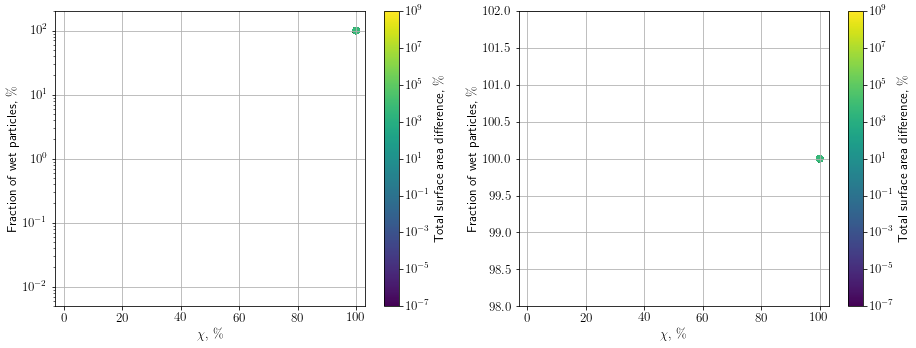

In [44]:
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_comp, df5.wet_frac_comp, c = df5.tot_surf_area_diff, edgecolors = 'None', s= 50, norm=mpl.colors.LogNorm(1e-7, 1e9))
plt.xlim(-3,103)
plt.ylim(5e-3,2e2)
plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
cbar = plt.colorbar()
cbar.set_label('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()
###################
plt.subplot(1,2,2)
# im1 = plt.scatter(df1.chi_n2o5, abs(df1.k_error), c = df1.bulk_h2o_masses, edgecolors = 'none', s= df1.wet_frac, norm=mpl.colors.LogNorm(1e-3, 1e2))
im1 = plt.scatter(df5.chi_n2o5_comp, df5.wet_frac_comp, c = df5.tot_surf_area_diff, edgecolors = 'None', s= 50, norm=mpl.colors.LogNorm(1e-7, 1e9))
plt.xlim(-3,103)
plt.ylim(98,102)
# plt.yscale('log')
plt.xlabel('$\chi,\,\%$')
plt.ylabel('Fraction of wet particles, $\%$')
cbar = plt.colorbar()
cbar.set_label('Total surface area difference, $\%$')
# plt.text(-2, 115, r'$\rm (a)\,compare\,reaction\,coefficients\$')
plt.grid()

plt.tight_layout(pad=1.0)

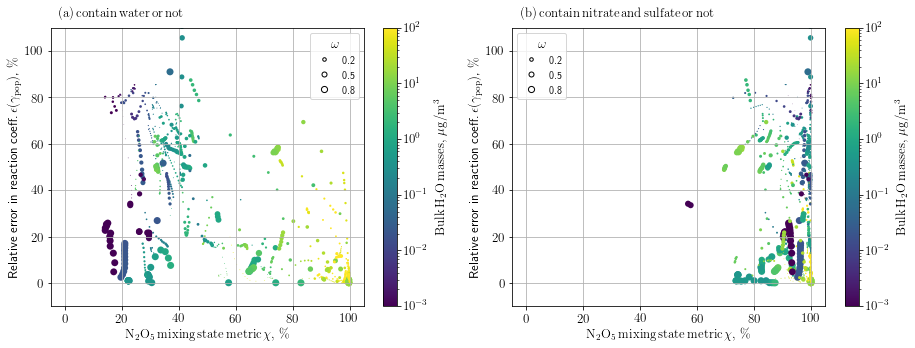

In [ ]:
# Only nighttime cases
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

s = pd.Series([r'$\rm (a)\,contain\,water\,or\,not$',r'$\rm (b)\,contain\,nitrate\,and\,sulfate\,or\,not$'])

plt.figure(figsize=(13,5))
###################
for i in [1,2]:
    plt.subplot(1,2,i)
    im1 = plt.scatter(df2["chi_"+str(i)], abs(df2.gamma_pop_error), c = df2.bulk_h2o_masses, edgecolors = 'none', s= df2.wi*50, norm=mpl.colors.LogNorm(1e-3, 1e2))
    kw = dict(prop="sizes", num=4, color='k', markerfacecolor='white', fmt="{x:.1f}",
            func=lambda s: s/50)
    plt.legend(*im1.legend_elements(**kw),
            loc=i, title=r"$\omega$", numpoints = 1, prop={'size':10})
    plt.xlim(-5,105)
    plt.ylim(-10,110)
    plt.xlabel(r'$\rm N_2O_5\,mixing\,state\,metric\,\chi,\,\%$')
    plt.ylabel(r'Relative error in reaction coeff.\,$\epsilon(\gamma_{\rm pop})$, $\%$')
    cbar = plt.colorbar()
    cbar.set_label(r'$\rm Bulk\,H_2O\,masses,\, \mu g/m^3$')
    plt.text(-2, 115, s[i-1])
    plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# time series comparison

## read data - dust

In [19]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [31]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[298.12  298.12  298.12  ... 298.12  298.12  298.12 ]
 [291.038 291.038 291.038 ... 291.038 291.038 291.038]
 [304.349 304.349 304.349 ... 304.349 304.349 304.349]
 ...
 [255.514 255.514 255.514 ... 255.514 255.514 255.514]
 [272.152 272.152 272.152 ... 272.152 272.152 272.152]
 [277.018 277.018 277.018 ... 277.018 277.018 277.018]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [48]:
d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         }
df_gas = pd.DataFrame(data=d_gas)

In [49]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

(1200, 10)
(2400, 10)


In [35]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

no3_error = (bulk_conc[2, 0, :, :].ravel() - 
               bulk_conc[1, 0, :, :].ravel())/bulk_conc[1, 0, :, :].ravel()  
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'no3_error': no3_error*100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 5)


In [36]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

(1200, 5)


## plot

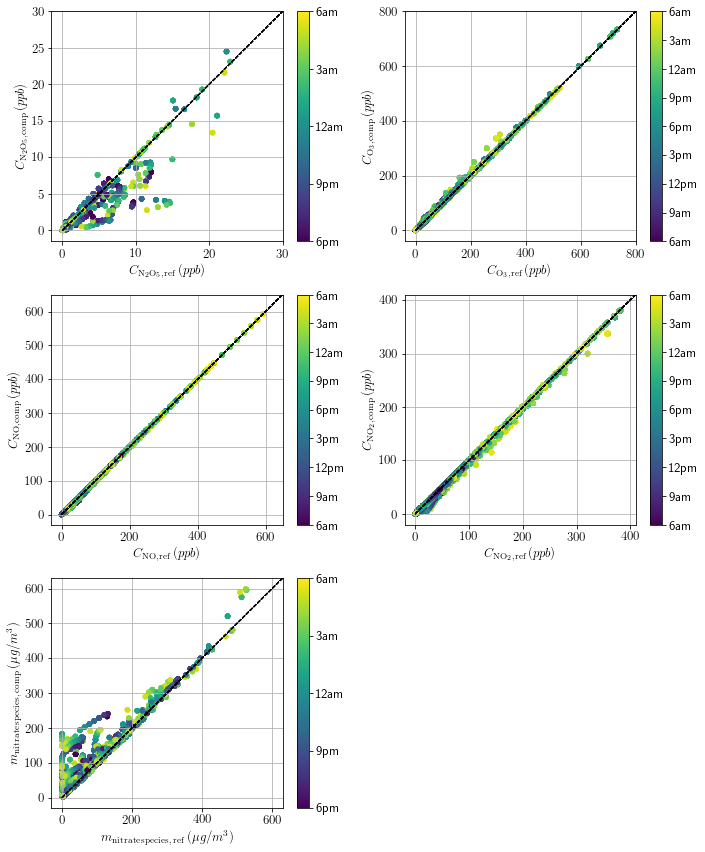

In [56]:
plt.figure(figsize=(10,12))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(-1.5,30); plt.ylim(-1.5,30)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-40,800); plt.ylim(-40,800)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-30,650); plt.ylim(-30,650)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-20,410); plt.ylim(-20,410)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-30,630); plt.ylim(-30,630)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.subplot(3,2,6)
# for t in range(37, 49, 1):
#     p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
#     plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

# plt.clim(37,49)
# cbar = plt.colorbar(ticks = np.linspace(37,49,5))
# cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# plt.xlim(-10,200); plt.ylim(-10,200)
# plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
# plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
# plt.grid()

plt.tight_layout(pad = 1.0)

plt.savefig('mixing_state_impact_time_series.pdf')

note: combine no3 and nitrate together

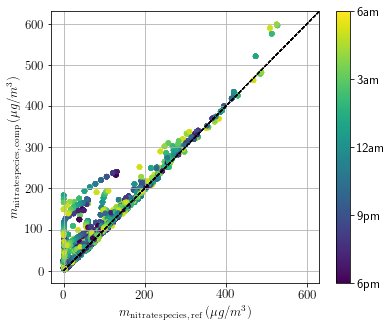

In [61]:
plt.figure(figsize=(6,5))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-30,630); plt.ylim(-30,630)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

plt.savefig('mixing_state_impact_time_series_nitrate_species.pdf')

# observations

1. water gets reacted, less amount of water available for the following day.
2. after composition averaging, all particles get wet - print out "aero_state_n_part" before and after removing dry.
3. dust: (43+380)/930 = 45.5% have +/- 20% error, no dust: (46+439)/952 = 50.9% have +/- 20% error